In [1]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import netCDF4 as nc
import os
import re
import pytz

%matplotlib inline

# read in SOG data:

In [2]:
filename='/data/eolson/SOG/SOG-runs/SOGCompMZEff/profiles/hoff-SOG.dat'
file_obj = open(filename, 'rt')
for index, line in enumerate(file_obj):
    line = line.strip()
    if line.startswith('*FieldNames:'):
        field_names = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*FieldUnits:'):
        field_units = line.split(': ', 1)[1].split(', ')
    elif line.startswith('*HoffmuellerStartYr:'):
        year_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartDay:'):
        day_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerStartSec:'):
        sec_start = line.split(': ', 1)[1]
    elif line.startswith('*HoffmuellerInterval:'):
         interval = line.split(': ', 1)[1]
    elif line.startswith('*EndOfHeader'):
        break
data = pd.read_csv(filename, delim_whitespace=True, header=0, names=field_names, skiprows=index, chunksize=102)
# Timestamp in matplotlib time
dt_num = dts.date2num(dtm.datetime.strptime(year_start + ' ' + day_start, '%Y %j')) + float(sec_start)/86400
interval=float(interval)
# Extract dataframe chunks into dictionary
for index, chunk in enumerate(data):
    if index==0:
        da=chunk
    else:
        da=np.dstack((da,chunk))
z=da[:,0,0]
t=np.arange(da.shape[2])
t=(t+1.0)*3600
tt,zz=np.meshgrid(t,-z)
print field_names
#print t
#print day_start
#print dts.num2date(dt_num)
#print z

['depth', 'temperature', 'salinity', 'sigma-t', 'micro phytoplankton', 'nano phytoplankton', 'pico phytoplankton', 'micro zooplankton', 'nitrate', 'ammonium', 'silicon', 'dissolved inorganic carbon', 'dissolved oxygen', 'alkalinity', 'DOC detritus', 'POC detritus', 'DON detritus', 'PON detritus', 'refractory N detritus', 'biogenic Si detritus', 'total momentum eddy diffusivity', 'total temperature eddy diffusivity', 'total salinity eddy diffusivity', 'photosynthetic available radiation', 'u velocity', 'v velocity']


Load SS2DSOG nuts & bio data:

In [4]:

resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/run5x5_phys/'
fname='SalishSea_1h_20041019_20041020_grid_T.nc'
f=nc.Dataset(os.path.join(resultsDir,fname))
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
zSS=f.variables[zkey][:]
xxSS,zzSS=np.meshgrid(lons,-z[:])
xtSS,ytSS=np.meshgrid(lons,lats)
print fkeys
#f2name='/data/eolson/MEOPAR/SS2DSOGruns/nuts_SOG5x5_S3-2014-10-19-WithMRubraMicroZooRemin.nc'
#f2=nc.Dataset(f2name)

[u'nav_lon', u'nav_lat', u'deptht', u'time_counter', u'sossheig', u'votemper', u'vosaline', u'rain_rate', u'snow_rate']


(-60, 0)

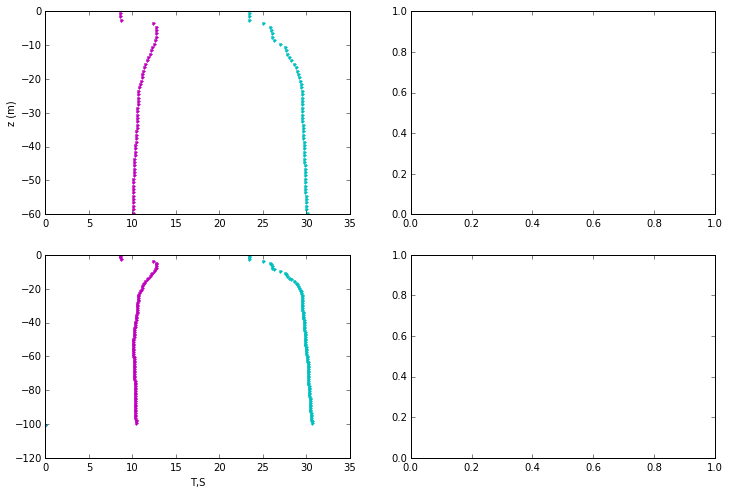

In [5]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
ti=47 # hrs since start


#pl0=axs[0,0].plot(f2.variables['PHY'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,0].set_ylabel('z (m)')
axs[1,0].set_xlabel('T,S')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar1=f.variables['votemper'][:,:,:,:] # diatoms
pl3=axs[1,0].plot(ivar1[360*ti,0:101,2,2],-zSS[0:101],'.',color='m')
pl3=axs[0,0].plot(ivar1[360*ti,0:101,2,2],-zSS[0:101],'.',color='m')
ivar2=f.variables['vosaline'][:,:,:,:]
pl3=axs[1,0].plot(ivar2[360*ti,0:101,2,2],-zSS[0:101],'.',color='c')
pl3=axs[0,0].plot(ivar2[360*ti,0:101,2,2],-zSS[0:101],'.',color='c')
axs[0,0].set_ylim([-60,0])



In [6]:
f.close()
